Loading latest user-generated agent, id=1
Loaded 10 trajs from cached_experts/CartPole-v1-train.pkl.xz
Loaded 50 trajs from cached_experts/CartPole-v1-test.pkl.xz
Train set reward 500.0 Test set reward 500.0
Loss 0.6412054900530726 Loss recompute 0.632537
Epoch 001: Train Loss: 0.641 Test Loss: 0.655
Loss 0.6383855 Loss recompute 0.6317171
Epoch 002: Train Loss: 0.638 Test Loss: 0.660
Loss 0.63679373 Loss recompute 0.6262828
Epoch 003: Train Loss: 0.637 Test Loss: 0.642
Loss 0.625271 Loss recompute 0.6208911
Epoch 004: Train Loss: 0.625 Test Loss: 0.658
Loss 0.6051575 Loss recompute 0.62904626
Epoch 005: Train Loss: 0.605 Test Loss: 0.676
Loss 0.60303074 Loss recompute 0.59185123
Epoch 006: Train Loss: 0.603 Test Loss: 0.639
Loss 0.6066413 Loss recompute 0.67443824
Epoch 007: Train Loss: 0.607 Test Loss: 0.735
Loss 0.59893167 Loss recompute 0.6046511
Epoch 008: Train Loss: 0.599 Test Loss: 0.676
Loss 0.6006306 Loss recompute 0.61902165
Epoch 009: Train Loss: 0.601 Test Loss: 0.660
Loss

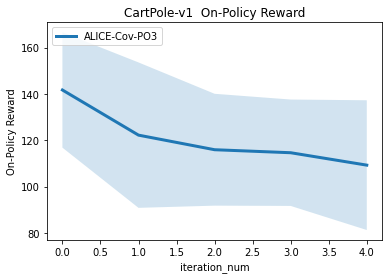

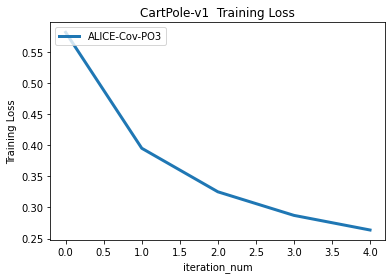

In [36]:
import ALICE
import importlib
importlib.reload(ALICE)
import matplotlib.pyplot as plt
seed = 314
res = ALICE.alg_runner('ALICE-Cov','CartPole-v1', verbose=3, total_opt_steps=500000, N_agg_iter=5, N_epoch=10, kill_feats=[3],
                       pair_with_E=True, N_E_traj=10, N_ALICE_traj=10, add_history=False, N_FAIL_samps=2, entropy_coeff = 0,
                       results_path='test.csv',random_demos=False,RL_expert_folder='my_RL_experts',RL_expert_load_best=True,
                       opt_seed=seed, run_seed=seed, recent_samp_priority_exp=1, learning_rate_BC=0.1, learning_rate=.01,# T_max_all=2,
                       #,horizon_weight_offset_exp = (0,500,0))#(5,5,2))
                       density_ratio_feature_map='standardscaler nys-2048', adversary_feature_map='standardscaler nys-128',
                       recompute_adversary_freq=2,adversary_t_bucket_size=10)

lines = ['alg']
#ALICE.plot_results(res,'iteration_num','entropy',lines)
ALICE.plot_results(res,'iteration_num','reward',lines)
ALICE.plot_results(res,'iteration_num','loss_train',lines)
#ALICE.plot_results(res,'iteration_num','hindsight_loss_train',lines)
#ALICE.plot_results(res,'iteration_num','loss_test',lines)
ALICE.plot_results(res,'iteration_num','loss_test',lines)
plt.show()

In [29]:
importlib.reload(ALICE)
import multiprocessing as mp
env_id = 'CartPole-v1'
exp_name = 'bucketsize-10'
results_path = 'results/results-'+env_id+'--'+exp_name+'.csv'
with mp.Pool(4) as p:
    for nf in [128,512,2048]:
        for BS in [1,10,100,500]:
            for rs in [314,159,265]:
                args = ('ALICE-FAIL',env_id)
                kwargs = {'verbose':0,'total_opt_steps':1000000,'N_agg_iter':10,'N_epoch':10,'kill_feats':(3,),'entropy_coeff':0,
                      'N_E_traj':10,'add_history':False,'N_ALICE_traj':10,'pair_with_E':True,'N_FAIL_samps':2,
                      'RL_expert_folder':'my_RL_experts','opt_seed':rs,'run_seed':rs,'learning_rate_BC':0.1,'learning_rate':.003,
                      'density_ratio_feature_map':'linear','adversary_feature_map':f'standardscaler nys-{nf}','results_path':results_path,
                      'recompute_adversary_freq':2,'adversary_t_bucket_size':BS,'n_feats':nf}
                ALICE.alg_runner(*args,**kwargs)
                print(f'num feats {nf}, bucket size {BS}, random seed {rs}')
            #p.apply_async(ALICE.alg_runner,args,kwargs)
    p.close(); p.join()

Loading latest user-generated agent, id=1
Train set reward 500.0 Test set reward 500.0
Hindsight Losses: 0.0745, 0.0745, 0.0752, 0.0758, 0.0751, 0.0753, 0.0759, 0.0764, 0.0772, 0.0790
CartPole-v1 10 ALICE-FAIL-PO3   pi_1 train:0.07452 test:0.61380 reward:131.7 (10.4 m)
num feats 128, bucket size 1, random seed 314
Loading latest user-generated agent, id=1
Train set reward 500.0 Test set reward 500.0
Hindsight Losses: 0.1112, 0.1105, 0.1108, 0.1106, 0.1107, 0.1098, 0.1105, 0.1108, 0.1107, 0.1111
CartPole-v1 10 ALICE-FAIL-PO3   pi_5 train:0.10978 test:0.60753 reward:144.1 (9.7 m)
num feats 128, bucket size 1, random seed 159
Loading latest user-generated agent, id=1
Train set reward 500.0 Test set reward 500.0
Hindsight Losses: 0.1095, 0.1090, 0.1089, 0.1091, 0.1093, 0.1094, 0.1099, 0.1101, 0.1102, 0.1148
CartPole-v1 10 ALICE-FAIL-PO3   pi_2 train:0.10893 test:0.60922 reward:147.8 (11.1 m)
num feats 128, bucket size 1, random seed 265
Loading latest user-generated agent, id=1
Train set r

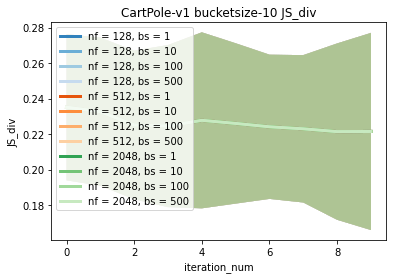

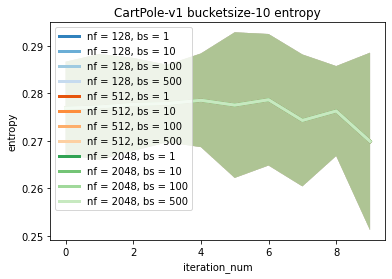

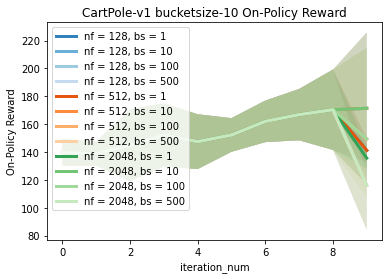

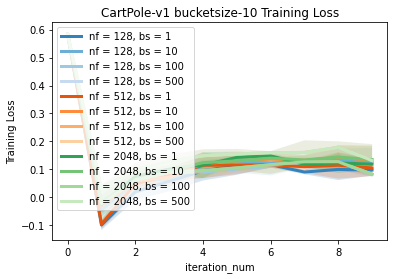

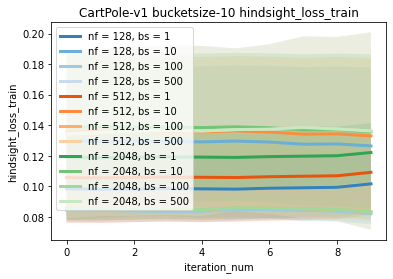

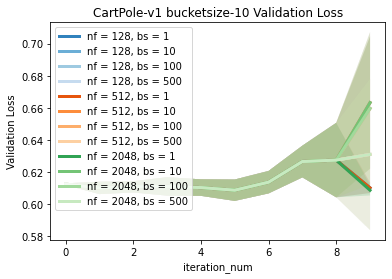

In [33]:
importlib.reload(ALICE)
lines = ['n_feats','adversary_t_bucket_size']
filters = None
save_dir = 'results'
cmap = 'tab20c'
ALICE.plot_results(results_path,'iteration_num','JS_div',lines,filters,save_dir=save_dir,exp_name=exp_name,colormap=cmap)
ALICE.plot_results(results_path,'iteration_num','entropy',lines,filters,save_dir=save_dir,exp_name=exp_name,colormap=cmap)
ALICE.plot_results(results_path,'iteration_num','reward',lines,filters,save_dir=save_dir,exp_name=exp_name,colormap=cmap)
ALICE.plot_results(results_path,'iteration_num','loss_train',lines,filters,save_dir=save_dir,exp_name=exp_name,colormap=cmap)
ALICE.plot_results(results_path,'iteration_num','hindsight_loss_train',lines,filters,save_dir=save_dir,exp_name=exp_name,colormap=cmap)
ALICE.plot_results(results_path,'iteration_num','loss_test',lines,filters,save_dir=save_dir,exp_name=exp_name,colormap=cmap) 

In [68]:
import ALICE
import importlib
importlib.reload(ALICE)
import matplotlib.pyplot as plt
seed = 314
res = ALICE.alg_runner('BC','CartPole-v1', verbose=2, total_opt_steps=20000, N_agg_iter=5, N_epoch=10, kill_feats=[3],
                       pair_with_E=True, N_E_traj=10, N_ALICE_traj=10, add_history=False, N_FAIL_samps=2, entropy_coeff = 0,
                       results_path='test.csv',random_demos=False,RL_expert_folder='my_RL_experts',RL_expert_load_best=True,
                       opt_seed=seed, run_seed=seed, recent_samp_priority_exp=1, learning_rate_BC=0.1, learning_rate=.01,# T_max_all=2,
                       #,horizon_weight_offset_exp = (0,500,0))#(5,5,2))
                       density_ratio_feature_map='standardscaler nys-2048', adversary_feature_map='standardscaler nys-128',
                       recompute_adversary_freq=2,adversary_t_bucket_size=10,FORWARD=True)

lines = ['alg']
#ALICE.plot_results(res,'iteration_num','entropy',lines)
ALICE.plot_results(res,'iteration_num','reward',lines)
ALICE.plot_results(res,'iteration_num','loss_train',lines)
#ALICE.plot_results(res,'iteration_num','hindsight_loss_train',lines)
#ALICE.plot_results(res,'iteration_num','loss_test',lines)
ALICE.plot_results(res,'iteration_num','loss_test',lines)
plt.show()

Loading latest user-generated agent, id=1
Train set reward 500.0 Test set reward 500.0


/home/jonathan/ALICE/venv_ALICE/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/jonathan/ALICE/venv_ALICE/lib/python3.6/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/home/jonathan/ALICE/venv_ALICE/lib/python3.6/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

##   Num switched 10, Entropy 0.000, Mean abs logit 5.50, Min abs logit 5.133, Entropy Coeff 0
Train Loss (10 Epochs): 0.000 Test Loss: 7.551 (0.0 min)
10 episodes, (0.0 min, DF 0.0MB) Avg reward 1.0+-0.0,
T_max 0
t 0 df_L 10
##   Num switched 0, Entropy 0.088, Mean abs logit 1.25, Min abs logit 1.033, Entropy Coeff 0
Train Loss (10 Epochs): 0.000 Test Loss: 4.411 (0.0 min)
10 episodes, (0.0 min, DF 0.0MB) Avg reward 1.0+-0.0,
T_max 1
t 1 df_L 20
##   Num switched 7, Entropy 0.304, Mean abs logit 0.24, Min abs logit 0.032, Entropy Coeff 0
Train Loss (10 Epochs): 0.000 Test Loss: 2.033 (0.0 min)
10 episodes, (0.0 min, DF 0.0MB) Avg reward 1.0+-0.0,
T_max 2
t 2 df_L 30
##   Num switched 6, Entropy 0.000, Mean abs logit 4.59, Min abs logit 3.659, Entropy Coeff 0
Train Loss (10 Epochs): 0.000 Test Loss: 7.609 (0.0 min)
10 episodes, (0.0 min, DF 0.0MB) Avg reward 1.0+-0.0,
T_max 3
t 3 df_L 40
##   Num switched 10, Entropy 0.135, Mean abs logit 1.05, Min abs logit 0.892, Entropy Coeff 0
Trai

UnboundLocalError: local variable 'hindsight_losses' referenced before assignment